<a href="https://colab.research.google.com/github/MANOJVENKATH/Task_7/blob/main/Assignment_5_6_7_Ground_Cricket_Chirps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ground Cricket Chirps

In The Song of Insects (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures. Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature. Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks
1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

## Solution:

In [ ]:
## Import necessary libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

In [ ]:
df

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [ ]:
df.shape

(15, 2)

In [ ]:
print("Number of rows = ", df.shape[0])
print("Number of columns = ", df.shape[1])

Number of rows =  15
Number of columns =  2


### Clean the data

In [ ]:
df.isna().apply(pd.value_counts).T

,False
Chirps/Second,15
Ground Temperature,15


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Chirps/Second       15 non-null     float64
 1   Ground Temperature  15 non-null     float64
dtypes: float64(2)
memory usage: 368.0 bytes


In [ ]:
df.dtypes

Chirps/Second         float64
Ground Temperature    float64
dtype: object

In [ ]:
df.isnull().sum()

Chirps/Second         0
Ground Temperature    0
dtype: int64

#### Statistical Measures

In [ ]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


Median and mean are closer to each other - there is less skew in the data

In [ ]:
corr=df.corr()

In [ ]:
corr[['Chirps/Second']]

,Chirps/Second
Chirps/Second,1.000000
Ground Temperature,0.832042


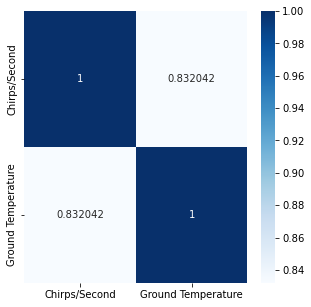

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(corr,cmap='Blues',annot=True,cbar=True,fmt='g')
plt.show()

#### Chart the original data and the equation on the chart.

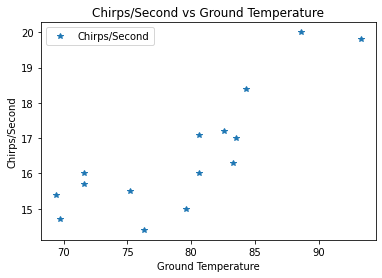

In [ ]:
df.plot(x='Ground Temperature', y='Chirps/Second', style='*')
plt.title('Chirps/Second vs Ground Temperature')
plt.xlabel('Ground Temperature')
plt.ylabel('Chirps/Second')
plt.show()

### Data Preparation

In [ ]:
X=df[['Ground Temperature']]
y=df[['Chirps/Second']]

### Split Data

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(10, 1) (5, 1) (10, 1) (5, 1)


### Model Training

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(X_test)

Intercept c 

In [ ]:
lr.intercept_

array([1.16773187])

 Slope or m in y=mx+c

In [ ]:
lr.coef_

array([[0.19353629]])

### Evaluation

In [ ]:
r2_score(y_test,y_pred)

0.7986678171941262

1 . Find the linear regression equation for this data.

y=mx+c

predicted Chirps/Second=0.19353629(Ground Temperature)+1.16773187

2.Chart the original data and the equation on the chart.

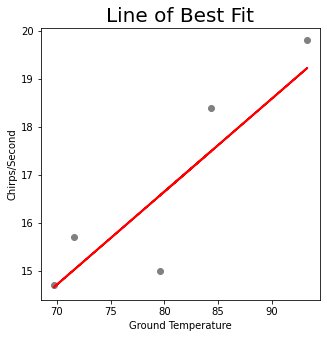

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(X_test,y_test,color='gray')
plt.plot(X_test,y_pred,color='red',linewidth=2)
plt.xlabel('Ground Temperature')
plt.ylabel('Chirps/Second')
plt.title('Line of Best Fit',fontsize=20)
plt.show()

In [ ]:
y_act=y_test.values
y_act

array([[18.4],
       [15.7],
       [14.7],
       [19.8],
       [15. ]])

In [ ]:
y_pred

array([[17.48284117],
       [15.02493028],
       [14.65721133],
       [19.22466779],
       [16.5732206 ]])

In [ ]:
data=pd.DataFrame({'Actual':y_act.flatten(),'Predicted': y_pred.flatten()})
data

,Actual,Predicted
0,18.4,17.482841
1,15.7,15.024930
2,14.7,14.657211
3,19.8,19.224668
4,15.0,16.573221


3.Find the equation's  𝑅2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
r2_score(y_test,y_pred)

0.7986678171941262

4.Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?

In [ ]:

#predicted Chirps/Second=1.09024852(Ground Temperature)+16.49
lr.predict([[95]])

array([[19.55367948]])

5.Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?

In [ ]:
#18=0.19353629(Ground Temperature)+1.16773187
86.97